<a href="https://colab.research.google.com/github/SharmaSensei/UnifiedMentorProjects/blob/main/Crop_Production_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

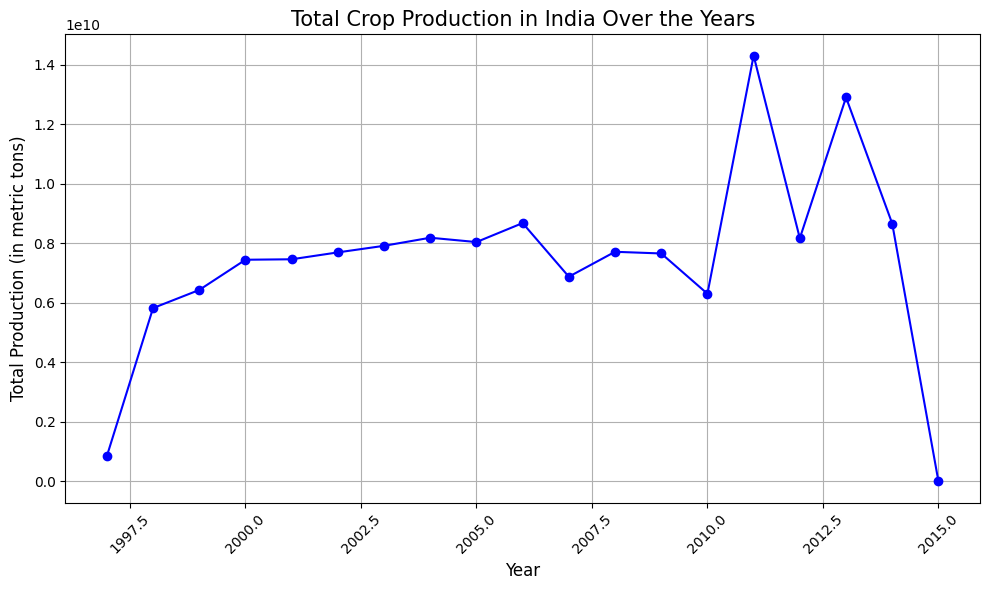

<ipython-input-2-2419d4f72da7>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_crops.values, y=top_crops.index, palette='Blues_d')


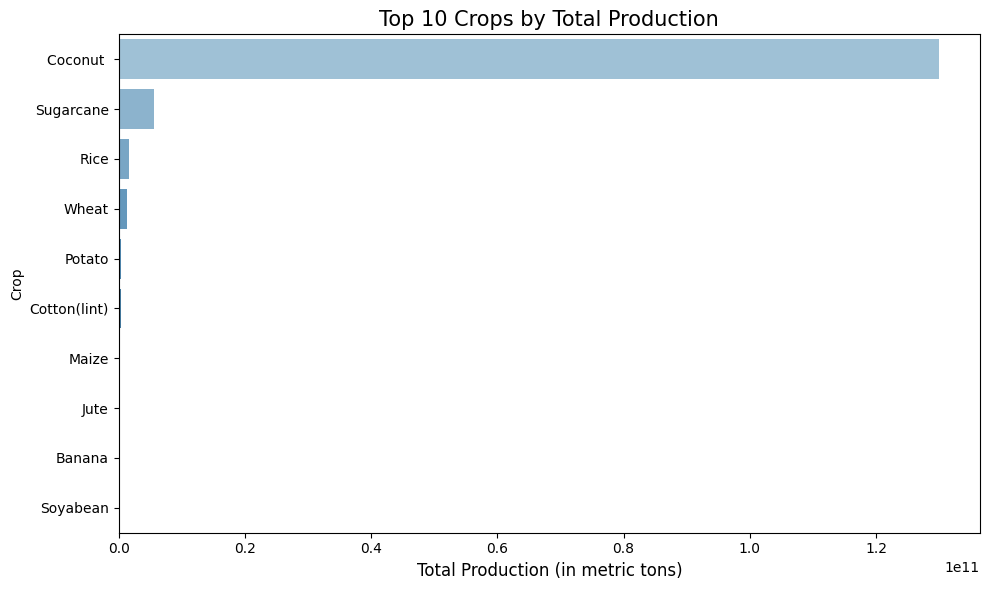

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
crop_data = pd.read_csv('/Crop Production data.csv')

# Handle missing values in 'Production' column by filling with the median production
crop_data['Production'].fillna(crop_data['Production'].median(), inplace=True)

# Basic analysis of crop production over the years
crop_production_by_year = crop_data.groupby('Crop_Year')['Production'].sum()

# Analysis of top crops by total production
top_crops = crop_data.groupby('Crop')['Production'].sum().sort_values(ascending=False).head(10)

# Plot 1: Crop Production over the Years
plt.figure(figsize=(10, 6))
plt.plot(crop_production_by_year.index, crop_production_by_year.values, marker='o', color='b')
plt.title('Total Crop Production in India Over the Years', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Production (in metric tons)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Top 10 Crops by Total Production
plt.figure(figsize=(10, 6))
sns.barplot(x=top_crops.values, y=top_crops.index, palette='Blues_d')
plt.title('Top 10 Crops by Total Production', fontsize=15)
plt.xlabel('Total Production (in metric tons)', fontsize=12)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


R-squared: 0.7190724925761421
RMSE: 6695272.444712351


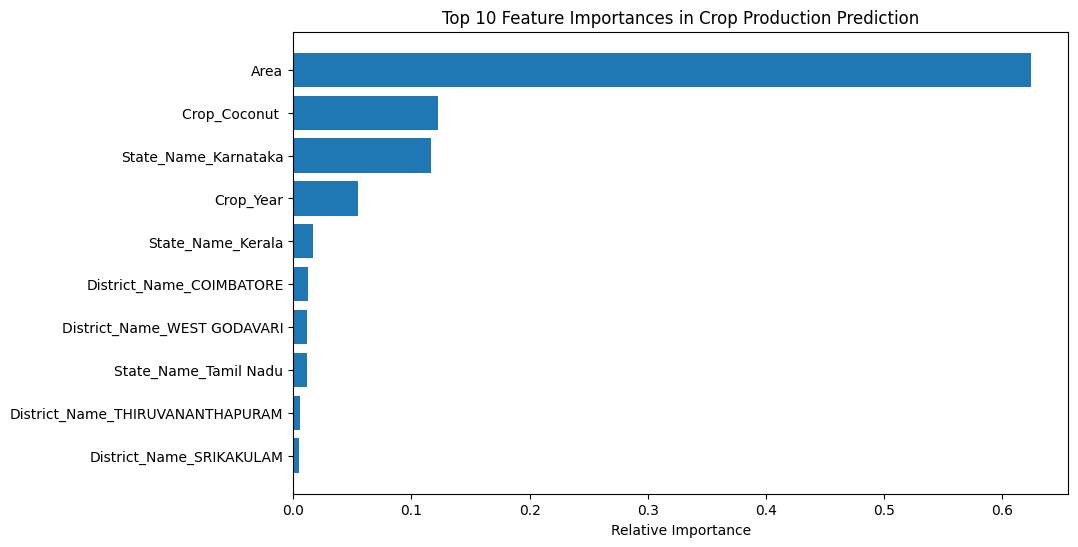

In [ ]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Convert categorical variables to dummy variables
crop_data_encoded = pd.get_dummies(crop_data[['State_Name', 'District_Name', 'Season', 'Crop']], drop_first=True)

# Add numerical features (Area and Crop Year) to the encoded dataframe
crop_data_encoded['Area'] = crop_data['Area']
crop_data_encoded['Crop_Year'] = crop_data['Crop_Year']

# Target variable (Production)
X = crop_data_encoded
y = crop_data['Production']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with fewer estimators
rf_model = RandomForestRegressor(n_estimators=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f'R-squared: {r2}')
print(f'RMSE: {rmse}')

# Get feature importances
importances = rf_model.feature_importances_
features = X.columns

# Plot the top 10 important features
indices = importances.argsort()[-10:]
plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.title('Top 10 Feature Importances in Crop Production Prediction')
plt.show()
